In [12]:
from Functions.fn_basic import *
from Functions.fn_stats import pairedTtest
from Functions.fn_plots import *

import os, mne
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from statannotations.Annotator import Annotator

In [52]:
#exp_folder = input('Experiment folder (e.g., Eyes Open\Baseline):')
exp_folder_1 = r"Eyes Closed\6 weeks"
exp_folder_2 = r"Eyes Closed\10 weeks"
# TO-DO! Get the final folder name to a variable to use for plotting

psd_reg_folder = r"Results\PSD\regions"
psd_ch_folder = r"Results\PSD\channels"

[dir_inprogress_reg_1,b_names_reg_1,condition_reg_1] = readPSDFiles(exp_folder_1,psd_reg_folder)
[dir_inprogress_reg_2,b_names_reg_2,condition_reg_2] = readPSDFiles(exp_folder_2,psd_reg_folder)

[dir_inprogress_ch_1,b_names_ch_1,condition_ch_1] = readPSDFiles(exp_folder_1,psd_ch_folder)
[dir_inprogress_ch_2,b_names_ch_2,condition_ch_2] = readPSDFiles(exp_folder_2,psd_ch_folder)

clean_folder = r"Data\Clean"
dir_inprogress_epo = os.path.join(clean_folder,exp_folder_1)
_, subject_names = readFiles(dir_inprogress_epo,"_clean-epo.fif")
epochs = mne.read_epochs(fname='{}\{}_clean-epo.fif'.format(dir_inprogress_epo,subject_names[0]))

Files in folder: 5
Files in folder: 5
Files in folder: 5
Files in folder: 5
Files in folder: 26
Reading c:\Users\TANIJARV\Downloads\Ketamine-SI project\eeg-pipeline\Data\Clean\Eyes Closed\6 weeks\OKTOS_0001_06D_EC_clean-epo.fif ...
    Read a total of 1 projection items:
        EOG-eeg--0.200-0.200-PCA-01 (1 x 32) active
    Found the data of interest:
        t =       0.00 ...    4999.02 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
49 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [53]:
df_psd_reg = pd.DataFrame()
for i in range(len(b_names_reg_1)):
    globals()[b_names_reg_1[i]] = pd.read_excel('{}\{}.xlsx'.format(dir_inprogress_reg_1,b_names_reg_1[i]))\
                            .assign(**{'Frequency band': condition_reg_1[i][1],'Condition': condition_reg_1[i][0]})
    globals()[b_names_reg_2[i]] = pd.read_excel('{}\{}.xlsx'.format(dir_inprogress_reg_2,b_names_reg_2[i]))\
                            .assign(**{'Frequency band': condition_reg_2[i][1],'Condition': condition_reg_2[i][0]})

    globals()["df_psdreg_"+str(i)] = pd.concat([globals()[b_names_reg_1[i]],globals()[b_names_reg_2[i]]])
    df_psd_reg = pd.concat([df_psd_reg,globals()["df_psdreg_"+str(i)]])

df_reg_pvals,significant_reg = pairedTtest(df_psd_reg)
try:
    os.makedirs(os.path.join(psd_reg_folder,''))
except FileExistsError:
    pass
df_reg_pvals.to_excel(r"Results\PSD\regions\p-values_{}-{}.xlsx".format(condition_reg_1[1][0],condition_reg_2[1][0]))

df_psd_ch = pd.DataFrame()
for i in range(len(b_names_ch_1)):
    globals()[b_names_ch_1[i]] = pd.read_excel('{}\{}.xlsx'.format(dir_inprogress_ch_1,b_names_ch_1[i]))\
                            .assign(**{'Frequency band': condition_ch_1[i][1],'Condition': condition_ch_1[i][0]})
    globals()[b_names_ch_2[i]] = pd.read_excel('{}\{}.xlsx'.format(dir_inprogress_ch_2,b_names_ch_2[i]))\
                            .assign(**{'Frequency band': condition_ch_2[i][1],'Condition': condition_ch_2[i][0]})

    globals()["df_psdch_"+str(i)] = pd.concat([globals()[b_names_ch_1[i]],globals()[b_names_ch_2[i]]])
    df_psd_ch = pd.concat([df_psd_ch,globals()["df_psdch_"+str(i)]])

df_ch_pvals,significant_ch = pairedTtest(df_psd_ch)
try:
    os.makedirs(os.path.join(psd_ch_folder,''))
except FileExistsError:
    pass
df_ch_pvals.to_excel(r"Results\PSD\channels\p-values_{}-{}.xlsx".format(condition_ch_1[1][0],condition_ch_2[1][0]))

print('Conditions in work:',df_psd_reg['Condition'].unique())

Significant changes of Alpha are:
Temporal with p-value of 0.0058859490618399105
Centro-parietal with p-value of 0.01503266968249168
Significant changes of Delta are:
Temporal with p-value of 0.0315096247461015
Significant changes of Low-Beta are:
Centro-parietal with p-value of 0.044695174307290315
Occipital with p-value of 0.03162659104134695
Significant changes of Theta are:
Temporal with p-value of 0.020626482570808506
Significant changes of Alpha are:
F7 with p-value of 0.04248024635974159
FC5 with p-value of 0.017482333593909074
T7 with p-value of 0.018748629080201074
C3 with p-value of 0.006868091978089839
CP5 with p-value of 0.00966034053441036
P7 with p-value of 0.03796480918612107
P3 with p-value of 0.01494594490924406
PO3 with p-value of 0.03381436995926004
P4 with p-value of 0.0368546375578944
P8 with p-value of 0.026265972875122792
CP6 with p-value of 0.012560245588419526
C4 with p-value of 0.019010517399696125
T8 with p-value of 0.019046550981957823
FC6 with p-value of 0.

Conditions in work: ['EC_06' 'EC_07']
Plotting EC_06 and EC_07 for Alpha
Plotting EC_06 and EC_07 for Delta
Plotting EC_06 and EC_07 for High-Beta
Plotting EC_06 and EC_07 for Low-Beta
Plotting EC_06 and EC_07 for Theta


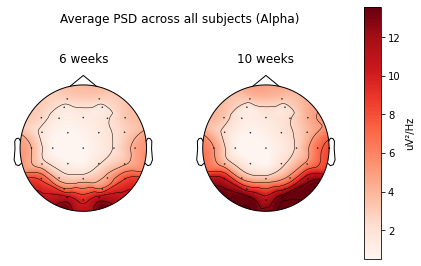

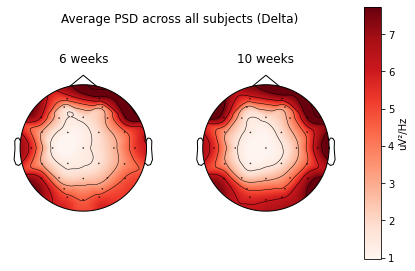

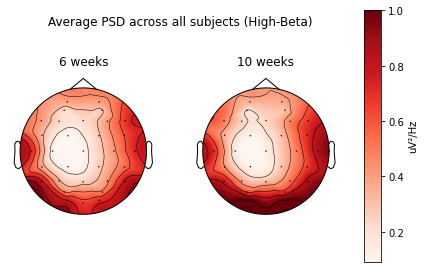

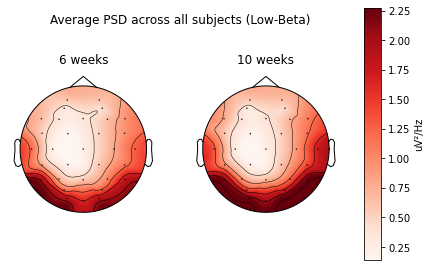

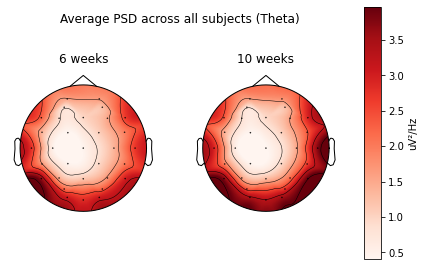

In [54]:
print('Conditions in work:',df_psd_reg['Condition'].unique())

for b_name in (df_psd_ch['Frequency band'].unique()):
    plotPSDTopomaps(df_psd_ch,epochs,b_name,['6 weeks','10 weeks'],'Average PSD across all subjects ({})'.format(b_name))

In [16]:
print(significant_reg)
print(significant_ch)

[{'Low-Beta': 'Centro-parietal'}]
[{'Low-Beta': 'Pz'} {'Low-Beta': 'PO3'} {'Low-Beta': 'FC2'}]


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Low-Beta_EC_06 vs. Low-Beta_EC_07: t-test paired samples, P_val:1.223e-01 t=-1.599e+00


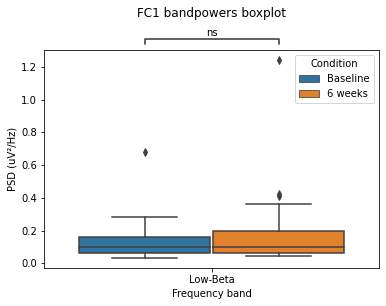

In [25]:
plotBoxplotROI(df_psd_ch,bands=['Low-Beta'],
              region='FC1',condition_names=['Baseline','6 weeks'],
              stat_test='t-test_paired',ast_loc='outside')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Alpha_EC_06 vs. Alpha_EC_07: t-test paired samples, P_val:1.503e-02 t=-2.611e+00


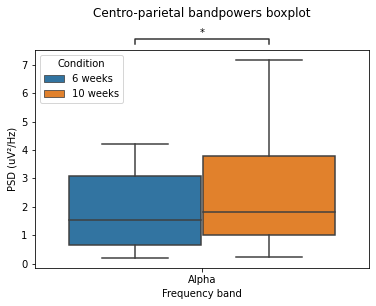

In [48]:
plotBoxplotROI(df_psd_reg,bands=['Alpha'],
              region='Centro-parietal',condition_names=['6 weeks','10 weeks'],
              stat_test='t-test_paired',ast_loc='outside')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Temporal_EC_00 vs. Temporal_EC_06: t-test paired samples, P_val:3.329e-01 t=9.874e-01
Frontal_EC_00 vs. Frontal_EC_06: t-test paired samples, P_val:4.331e-02 t=2.129e+00
Centro-parietal_EC_00 vs. Centro-parietal_EC_06: t-test paired samples, P_val:8.325e-02 t=1.804e+00
Occipital_EC_00 vs. Occipital_EC_06: t-test paired samples, P_val:4.051e-01 t=8.469e-01


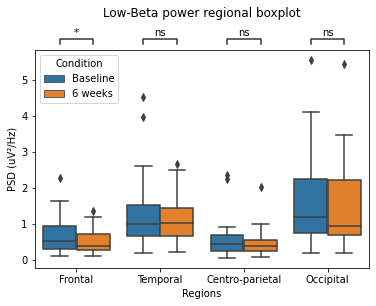

In [36]:
plotBoxplotBand(df_psd_reg,regions=['Frontal','Temporal','Centro-parietal','Occipital'],
                band='Low-Beta',condition_names=['Baseline','6 weeks'],
                stat_test='t-test_paired',ast_loc='outside')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Pz_EC_00 vs. Pz_EC_06: t-test paired samples, P_val:3.367e-02 t=2.248e+00
FC1_EC_00 vs. FC1_EC_06: t-test paired samples, P_val:7.627e-03 t=2.902e+00


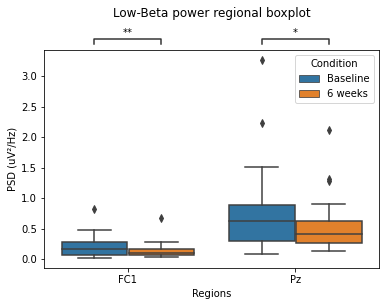

In [9]:
plotBoxplotBand(df_psd_ch,regions=['FC1','Pz'],
                band='Low-Beta',condition_names=['Baseline','6 weeks'],
                stat_test='t-test_paired',ast_loc='outside')

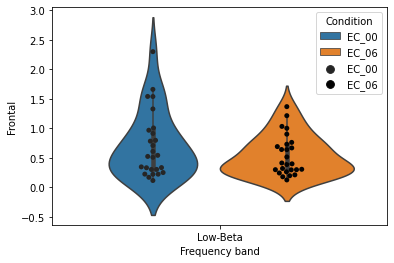

In [11]:
plt.figure()
ax = sns.violinplot(x='Frequency band', y='Frontal',
                 hue='Condition',
                 data=df_psd_reg[df_psd_reg['Frequency band'] == 'Low-Beta'])
ax = sns.swarmplot(x='Frequency band', y='Frontal',
                   hue='Condition', color='0.01', dodge=True,
                   data=df_psd_reg[df_psd_reg['Frequency band'] == 'Low-Beta'])